In [90]:
import numpy as np; np.set_printoptions(precision=3)
import pandas as pd; pd.set_option('display.precision',3)
import matplotlib.pyplot as plt
import seaborn as sns

## HW 1 Multinomial Naive Bayes Classifier


https://jakevdp.github.io/PythonDataScienceHandbook/05.05-naive-bayes.html 
이거보고 그대로 따라해보자

In [91]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

#### Gaussian Naive Bayes

In this classifier, the assumption is that data from each label is drawn from a simple Gaussian distribution.

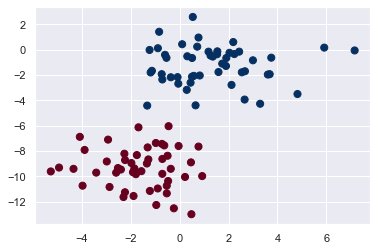

In [92]:
from sklearn.datasets import make_blobs
X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu');

In [93]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X, y);

In [94]:
rng = np.random.RandomState(0)
Xnew = [-6, -14] + [14, 18] * rng.rand(2000, 2)
ynew = model.predict(Xnew)

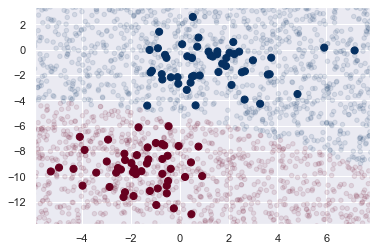

In [95]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, cmap='RdBu', alpha=0.1)
plt.axis(lim);

#### Example: Classifying text

In [96]:
from sklearn.datasets import fetch_20newsgroups

data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

`comp.graphics` , `rec.autos`, `talk.politics.gun`, `sci.med` 카테고리 네개를 뽑았다

In [97]:
categories = ['comp.graphics', 'rec.autos',
              'talk.politics.guns', 'sci.med']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

In [98]:
print(train.data[3])

From: marshatt@feserve.cc.purdue.edu (Zauberer)
Subject: Re: WARNING.....(please read)...
Organization: Purdue University
Distribution: usa
Lines: 5

 sorry about that last post, my server neglected to send the message:

 Can we please keep this group to AUTOMOTIVE topics. Thank you.





In [99]:
print(train.data[10])

From: caf@omen.UUCP (Chuck Forsberg WA7KGX)
Subject: Re: My New Diet --> IT WORKS GREAT !!!!
Organization: Omen Technology INC, Portland Rain Forest
Lines: 34

In article <1993Apr5.191712.7543@inmet.camb.inmet.com> mazur@bluefin.camb.inmet.com (Beth Mazur) writes:
>In <1993Apr03.1.6627@omen.UUCP> caf@omen.UUCP (Chuck Forsberg WA7KGX) writes:
>>Gordon, your experience is valid for many, but not all.  The
>>fact that you know a few people who have been overweight and are
>>now stable at a lower (normal or just less?) weight does not
>>contradict the observation that only 5-10 per cent can maintain
>>ideal weight with current technology.
>
>Actually, the observation is that only 5-10% of those who seek help
>from your so-called "diet evangelists" can maintain their weight.  I
>happen to agree with Keith Lynch that there are many people who can
>and do lose weight on their own, and who are not reflected in the
>dismal failure rate that is often quoted.
>
>Wasn't there a study where a resea

각각의 데이터에는 text 형식으로 이메일이 입력되어 있고, 내용을 convert the content of each string into a vector of numbers 해서 주제를 classify 할 수 있는지 보자

In [100]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [101]:
model.fit(train.data, train.target)
labels = model.predict(test.data)

In [102]:
train.data[10]

'From: caf@omen.UUCP (Chuck Forsberg WA7KGX)\nSubject: Re: My New Diet --> IT WORKS GREAT !!!!\nOrganization: Omen Technology INC, Portland Rain Forest\nLines: 34\n\nIn article <1993Apr5.191712.7543@inmet.camb.inmet.com> mazur@bluefin.camb.inmet.com (Beth Mazur) writes:\n>In <1993Apr03.1.6627@omen.UUCP> caf@omen.UUCP (Chuck Forsberg WA7KGX) writes:\n>>Gordon, your experience is valid for many, but not all.  The\n>>fact that you know a few people who have been overweight and are\n>>now stable at a lower (normal or just less?) weight does not\n>>contradict the observation that only 5-10 per cent can maintain\n>>ideal weight with current technology.\n>\n>Actually, the observation is that only 5-10% of those who seek help\n>from your so-called "diet evangelists" can maintain their weight.  I\n>happen to agree with Keith Lynch that there are many people who can\n>and do lose weight on their own, and who are not reflected in the\n>dismal failure rate that is often quoted.\n>\n>Wasn\'t there 

In [103]:
err = []
for i in range(1,labels.shape[0]):
    if not test.target[i] == labels[i]: 
        err.append(i)
print(err)

[12, 57, 72, 73, 85, 119, 152, 185, 193, 196, 200, 203, 208, 223, 227, 245, 271, 277, 281, 299, 326, 334, 363, 382, 417, 424, 440, 452, 466, 480, 503, 508, 536, 540, 549, 552, 555, 572, 598, 626, 647, 653, 668, 692, 703, 764, 769, 771, 791, 796, 797, 862, 863, 901, 908, 912, 946, 948, 961, 965, 988, 1002, 1014, 1027, 1034, 1042, 1051, 1063, 1091, 1100, 1103, 1147, 1149, 1151, 1166, 1179, 1209, 1220, 1234, 1273, 1276, 1285, 1287, 1338, 1353, 1399, 1419, 1423, 1425, 1429, 1432, 1434, 1439, 1501, 1510, 1527, 1529, 1531, 1535]


In [104]:
test.target[err[4]] # talk.politics.guns

2

In [105]:
labels[err[4]] # sci.med

3

In [106]:
print(train.data[err[4]])

From: gwm@spl1.spl.loral.com (Gary W. Mahan)
Subject: Re: Are BMW's worth the price?            
Organization: Loral Software Productivity Laboratory
Lines: 18

>sure sounds like they got a ringer.  the 325is i drove was definitely
>faster than that.  if you want to quote numbers, my AW AutoFile shows
>0-60 in 7.4, 1/4 mile in 15.9.  it quotes Car and Driver's figures
>of 6.9 and 15.3.  oh, BTW, these numbers are for the 325i.

Car and Driver rated the 325is (1988) at 7.2 0-60 , 1/4 at 15.2 (after 30k miles) last time I checked 8#}.

Automobile magazine rated new 325is 1/4 mile@16.2.

Gee , aint quotiin funner than the dickens!

Sounds like we need a race.  I'll let you have the newer version.  Can someone out there lend me a 1988 325is for a day 8-].  I wont hurt it, I promise.

>i don't know how the addition of variable valve timing for 1993 affects it.
>but don't take my word for it.  go drive it.

Actually I will take your word on it.  I refuse to test it (new 325is) because
I love

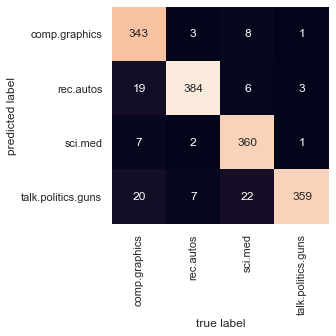

In [107]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

대부분 잘 된 것 같다.

In [108]:
def predict_category(s, train=train, model=model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

In [109]:
predict_category("two armed men ")

'talk.politics.guns'

In [110]:
predict_category("running roads drunken")

'rec.autos'

## HW 2

In [132]:
from sklearn.datasets import load_wine
wine = load_wine()

In [133]:
df = pd.DataFrame(wine.data, columns=wine.feature_names)
sy = pd.Series(wine.target, dtype="category")
sy = sy.cat.rename_categories(wine.target_names)
df['class'] = sy
wine = df

In [134]:
wine = wine.replace({'class':'class_0'},{'class':1}).copy()
wine = wine.replace({'class':'class_1'},{'class':2}).copy()
wine = wine.replace({'class':'class_2'},{'class':3}).copy()

In [135]:
wine.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'class'],
      dtype='object')

In [136]:
wine.rename(columns = {'od280/od315_of_diluted_wines':'diluted'}, inplace=True)

### 1. 데이터 전처리 및 시각화

#### A. 데이터 분포
#### B. 결측치 확인

- 데이터 확인

In [137]:
wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,diluted,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,1
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,1
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,1
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,1
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,1


- 데이터 dim 확인

In [138]:
wine.shape

(178, 14)

178개의 data와 13개의 변수, class는 총 3개이다. 

- 데이터 타입 체크

In [139]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
alcohol                 178 non-null float64
malic_acid              178 non-null float64
ash                     178 non-null float64
alcalinity_of_ash       178 non-null float64
magnesium               178 non-null float64
total_phenols           178 non-null float64
flavanoids              178 non-null float64
nonflavanoid_phenols    178 non-null float64
proanthocyanins         178 non-null float64
color_intensity         178 non-null float64
hue                     178 non-null float64
diluted                 178 non-null float64
proline                 178 non-null float64
class                   178 non-null int64
dtypes: float64(13), int64(1)
memory usage: 19.5 KB


class 변수를 제외한 나머지 변수들은 모둗 float64로 type이 맞춰져있다. 

In [140]:
wine.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,diluted,proline,class
count,178.000,178.000,178.000,178.000,178.000,178.000,178.000,178.000,178.000,178.000,178.000,178.000,178.000,178.000
mean,13.001,2.336,2.367,19.495,99.742,2.295,2.029,0.362,1.591,5.058,0.957,2.612,746.893,1.938
std,0.812,1.117,0.274,3.340,14.282,0.626,0.999,0.124,0.572,2.318,0.229,0.710,314.907,0.775
min,11.030,0.740,1.360,10.600,70.000,0.980,0.340,0.130,0.410,1.280,0.480,1.270,278.000,1.000
25%,12.362,1.603,2.210,17.200,88.000,1.742,1.205,0.270,1.250,3.220,0.782,1.938,500.500,1.000
50%,13.050,1.865,2.360,19.500,98.000,2.355,2.135,0.340,1.555,4.690,0.965,2.780,673.500,2.000
75%,13.678,3.083,2.558,21.500,107.000,2.800,2.875,0.438,1.950,6.200,1.120,3.170,985.000,3.000
max,14.830,5.800,3.230,30.000,162.000,3.880,5.080,0.660,3.580,13.000,1.710,4.000,1680.000,3.000


- null, NA 체크

In [141]:
wine.isnull().sum()

alcohol                 0
malic_acid              0
ash                     0
alcalinity_of_ash       0
magnesium               0
total_phenols           0
flavanoids              0
nonflavanoid_phenols    0
proanthocyanins         0
color_intensity         0
hue                     0
diluted                 0
proline                 0
class                   0
dtype: int64

NA 가 없다

- 종속변수 체크

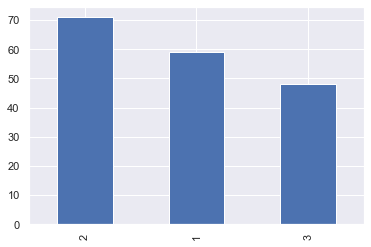

In [142]:
wine['class'].value_counts().plot(kind= 'bar')
plt.show()

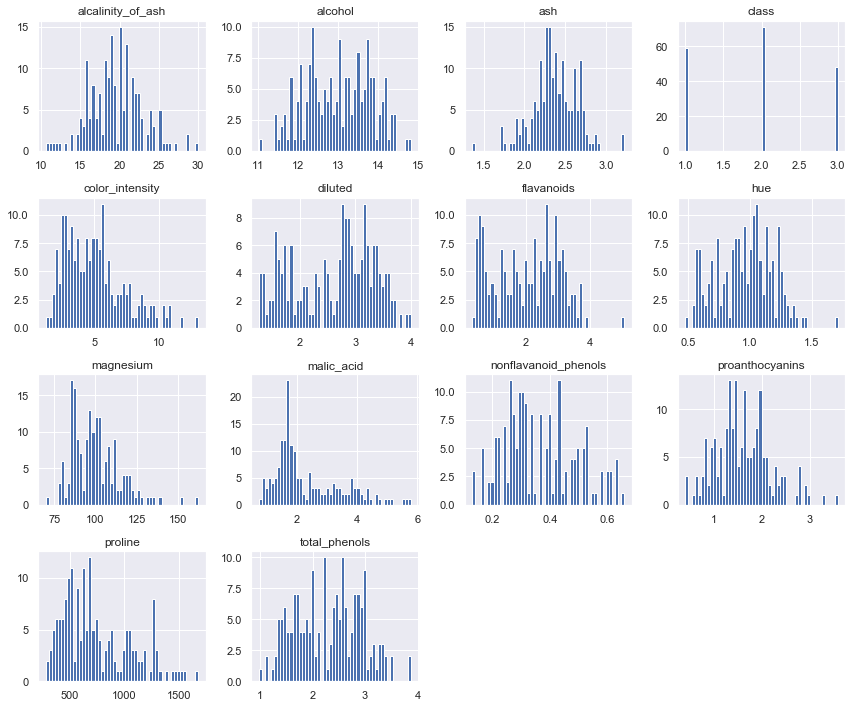

In [143]:
wine.hist(bins = 50, figsize= (12,10))
plt.tight_layout()

데이터의 분포는 괜찮아보인다

#### C. feature 결정

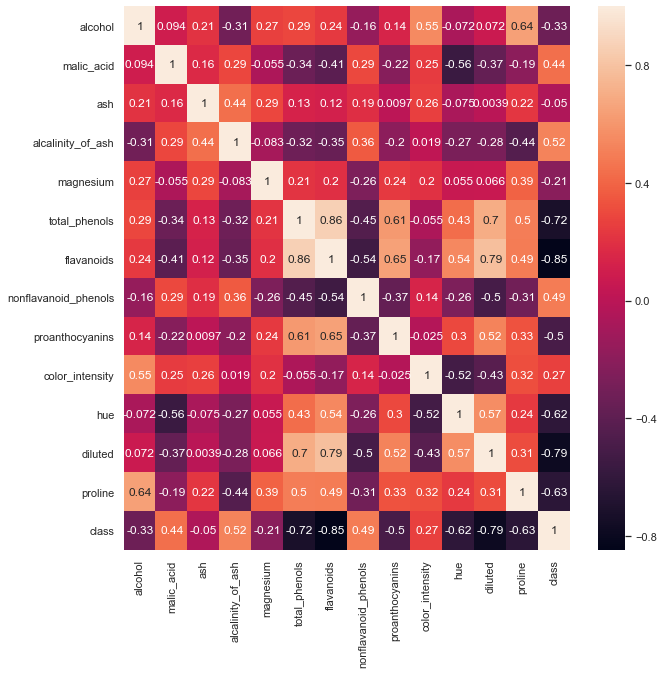

In [144]:
fig, ax = plt.subplots(figsize=(10,10))
corrMat = wine.corr()
sns.heatmap(corrMat, annot=True)
plt.show()

In [145]:
corrMat[abs(corrMat)>=0.7].sum()

alcohol                 1.000
malic_acid              1.000
ash                     1.000
alcalinity_of_ash       1.000
magnesium               1.000
total_phenols           1.145
flavanoids              1.804
nonflavanoid_phenols    1.000
proanthocyanins         1.000
color_intensity         1.000
hue                     1.000
diluted                 0.999
proline                 1.000
class                  -1.355
dtype: float64

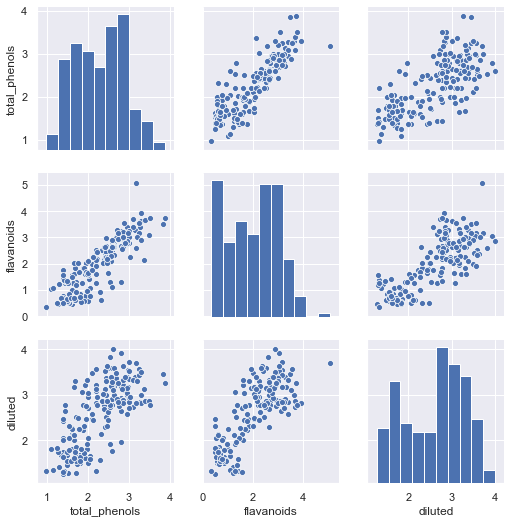

In [146]:
sns.pairplot(wine[['total_phenols', 'flavanoids',  'diluted']])

세 변수 `total_phenols`, `flavanoids`,  `diluted`의 pair plot에서 linear한 관계가 있는 걸 볼 수 있다. 서로 간에 correlation도 높으니 세 변수 중 class 변수와 correlation이 높은변수 `flavanoids`만 남겨두고 나머지는 삭제하자

In [147]:
del wine['total_phenols']
del wine['diluted']


In [148]:
wine.shape[1]

12

In [149]:
(abs(wine.corr())>0.7).sum()

alcohol                 1
malic_acid              1
ash                     1
alcalinity_of_ash       1
magnesium               1
flavanoids              2
nonflavanoid_phenols    1
proanthocyanins         1
color_intensity         1
hue                     1
proline                 1
class                   2
dtype: int64

`class`변수와의 corr빼고는 변수간 corr가 0.7보다 작아졌다. 

### 2. train & test set 나누기

In [151]:
from sklearn.model_selection import train_test_split

In [167]:
X_train, X_test, Y_train, Y_test = train_test_split(wine.iloc[:, 0:11], wine['class'], test_size=0.3, random_state= 730)

In [169]:
print(X_train.shape); print(Y_train.shape);
print(X_test.shape); print(Y_test.shape)

(124, 11)
(124,)
(54, 11)
(54,)


### 3. Test 에 다음의 모델을 fit 해보기

#### A. LDA / QDA

선형판별분석(LDA, Linear Discriminant analysis) : 독립변수 x의 조건부확률분포가 공통된 공분산 행렬을 가지는 다변수 정규분포라고 가정
이차판별분석(QDA, Quadratic Discriminant analysis) : 독립 변수 x는 실수이고 확률분포가 다변수 정규분포라고 가정.

큰 차이점은 분류시 선형판변분석은 직선으로 분류되고 이차판변분석은 직선이 아닌 것을 확인할 수 있다. 즉, 선형판별분석은 판별함수가 선형방정식이며 경계선이 직선이라는 것이다. 직선으로 경계를 구분하지만 이차판별분석과 성능에는 거의 차이가 없다는 것이 장점이다.   
[출처] 선형판별분석(LDA)와 이차판별분석(QDA)|작성자 갓제이

lda는 within-class 와 between-class covariance matrix를 기반으로

LDA

In [172]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import mean_squared_error as mse

In [178]:
lda = LinearDiscriminantAnalysis().fit(X_train, Y_train)
lda_train_mse = mse(Y_train, lda.predict(X_train))
lda_test_mse = mse(Y_test, lda.predict(X_test))
print("LDA train mse :", lda_train_mse);
print("LDA test mse :", lda_test_mse);

LDA train mse : 0.0
LDA test mse : 0.037037037037037035


In [188]:
print("LDA train score:",sum(Y_train == lda.predict(X_train))/len(Y_train));
print("LDA test score:",sum(Y_test == lda.predict(X_test))/len(Y_test));

LDA train score: 1.0
LDA test score: 0.9629629629629629


QDA


In [179]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [181]:
qda = LinearDiscriminantAnalysis().fit(X_train, Y_train)
qda_train_mse = mse(Y_train, qda.predict(X_train))
qda_test_mse = mse(Y_test, qda.predict(X_test))
print("QDA train mse :", qda_train_mse);
print("QDA test mse :", qda_test_mse);

QDA train mse : 0.0
QDA test mse : 0.037037037037037035


In [189]:
print("QDA train score:",sum(Y_train == qda.predict(X_train))/len(Y_train));
print("QDA test score:",sum(Y_test == qda.predict(X_test))/len(Y_test));

QDA train score: 1.0
QDA test score: 0.9629629629629629


#### B. Logistic Regression

In [190]:
from sklearn.linear_model import LogisticRegression

In [228]:
Logi_Reg = LogisticRegression(solver = 'sag', max_iter= 10000, multi_class= "auto")
logi = Logi_Reg.fit(X_train,Y_train)
logi_train_mse = mse(Y_train, logi.predict(X_train))
logi_test_mse = mse(Y_test, logi.predict(X_test))
print("Logistic train mse:", logi_train_mse); 
print("Logistic test mse:", logi_test_mse)

Logistic train mse: 0.08870967741935484
Logistic test mse: 0.07407407407407407


In [229]:
logi_train_score = sum(Y_train == logi.predict(X_train))/len(Y_train)
logi_test_score = sum(Y_test == logi.predict(X_test))/len(Y_test)

print("Logistic train score:",logi_train_score);
print("Logistic test score:",logi_test_score);

Logistic train score: 0.9354838709677419
Logistic test score: 0.9259259259259259


#### C. Logistic Regression with feature expansion (kcv로 차수결정)

In [230]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score

In [231]:
score = np.zeros
for i in list(np.arange(1,4)):
    poly = PolynomialFeatures(degree=i)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.fit_transform(X_test)
    logi_reg = Logi_Reg.fit(X_train_poly,Y_train)
    score_val = np.mean(cross_val_score(logi_reg, X_test_poly, Y_test, cv=5))
    print("Score of degree", i, ":", score_val)


Score of degree 1 : 0.9022222222222223
Score of degree 2 : 0.761010101010101
Score of degree 3 : 0.7039393939393939


그냥 1차로 해야겠다!

### 4. 각 모델에 대해 Test MSE 보고하고 결과 해석하기

In [232]:
print("LDA test mse :", lda_test_mse);
print("QDA test mse :", qda_test_mse);
print("Logistic test mse:", logi_test_mse)

LDA test mse : 0.037037037037037035
QDA test mse : 0.037037037037037035
Logistic test mse: 0.07407407407407407


In [233]:
print("LDA test score:",sum(Y_test == lda.predict(X_test))/len(Y_test));
print("QDA test score:",sum(Y_test == qda.predict(X_test))/len(Y_test));
print("Logistic test score:",logi_test_score);

LDA test score: 0.9629629629629629
QDA test score: 0.9629629629629629
Logistic test score: 0.9259259259259259


Logistic 보다는 LDA, QDA가 낫다